In [1]:
import pandas as pd
import numpy as np
import random
import warnings
from array import *
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
data_guru= pd.read_excel('data guru.xlsx')

data_sekolah = pd.read_excel('data sekolah.xlsx')

data_jarak = pd.read_excel('JARAK.xlsx')

dftr_guru = np.array(data_guru['Id Guru'])

dftr_sekolah = np.array(data_sekolah['id'])

In [3]:
#Membuat fungsi rombel_kelas untuk membuat rombel disetiap sekolah dimana terdapat 6 rombel disetiap sekolah, sehingga setiap sekolah 
#memerlukan 6 guru, dimana jumlah guru ada 636 dan jumlah sekolah ada 106
ids_ = []
def rombel_kelas() :#fungsi rombel_kelas
    indeks = 0
    for i in range (0,636) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        ids_.append(dftr_sekolah[indeks])
    return ids_

In [4]:
print(rombel_kelas())

[45, 45, 45, 45, 45, 45, 48, 48, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 56, 56, 56, 56, 56, 56, 67, 67, 67, 67, 67, 67, 87, 87, 87, 87, 87, 87, 93, 93, 93, 93, 93, 93, 96, 96, 96, 96, 96, 96, 100, 100, 100, 100, 100, 100, 108, 108, 108, 108, 108, 108, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 140, 140, 140, 140, 140, 140, 142, 142, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 146, 146, 146, 146, 146, 146, 151, 151, 151, 151, 151, 151, 153, 153, 153, 153, 153, 153, 160, 160, 160, 160, 160, 160, 161, 161, 161, 161, 161, 161, 167, 167, 167, 167, 167, 167, 168, 168, 168, 168, 168, 168, 170, 170, 170, 170, 170, 170, 175, 175, 175, 175, 175, 175, 182, 182, 182, 182, 182, 182, 185, 185, 185, 185, 185, 185, 186, 186, 186, 186, 186, 186, 189, 189, 189, 189, 189, 189, 204, 204, 204, 204, 204, 204, 216, 216, 216, 216, 216, 216, 222, 222, 222, 222, 222, 222, 228, 228, 228, 228, 228, 228, 234, 234, 234, 234, 234, 234, 246, 246, 246, 246, 246, 246, 249, 249, 249, 249, 249, 24

In [5]:
#Membuat fungsi rombel_guru untuk memasukan guru-guru secara random kedalam rombel(kelas) setiap sekolah
# 1 guru ke satu rombel disekolah dimana setiap sekolah terdapat 6 rombel, kemudian mencatat jarak setiap guru ke sekolah
def rombel_guru() :#fungsi rombel_guru
    indeks = 0
    jarak_ = []
    id_guru = np.random.permutation(dftr_guru)
    for i in range (len(id_guru)) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        jarak_guru = data_jarak.loc[(data_jarak['No_IDG'].values == id_guru[i]) & (data_jarak['No_IDS'].values == ids_[indeks]), ['Jarak']]
        jarak_.append(jarak_guru.values) 
    arr_gl = np.array([id_guru,jarak_], dtype = float)
    return arr_gl

In [6]:
#Membuat fungsi hitung_total_jarak untuk menghitung jarak total dari semua guru ke sekolah masing", 
#kemudian menyimpan data jarak total ke variabel tertentu
#makin besar total jaraknya justru situasinya makin buruk, 
#sedangkan makin kecil total jaraknya situasinya makin baik
def hitung_total_jarak(kromosom): # fungsi hitung_total_jarak
    total_jarak = [] 
    for i in range (len(kromosom)): 
        jarak_total_kromosom = sum(kromosom[i][1])
        total_jarak.append(jarak_total_kromosom) 
    return total_jarak

In [7]:
#Membuat fungsi hitung_fitness untuk menghitung fitness dari individu
#Nilai fitness adalah jarak total antara guru-sekolah
#makin besar total jaraknya justru situasinya makin buruk, 
#sedangkan makin kecil total jaraknya situasinya makin baik.  
#Oleh karena itu kita perlu ‘membaliknya’, agar makin besar nilai fitness maka situasinya makin baik.  
#Salah satu cara membaliknya adalah mengganti nilai fitness dengan (1 / nilai fitness)
def hitung_fitness(totalJarak,maksimal): # fungsi hitung_fitness
    fitKromosom = [] 
    for i in totalJarak:
        fitness = 1/i
        fitKromosom.append(fitness) 
    return fitKromosom

In [8]:
#Membuat fungsi hitung_probabilitas untuk menghitung nilai probabilitas seleksi setiap individu
def hitung_probabilitas (fitnessKromosom): # fungsi hitung_probabilitas
    prob = [] 
    total_fit = sum(fitnessKromosom)
    for i in range (len(fitnessKromosom)):
        probabilitas = fitnessKromosom[i]/total_fit
        prob.append(probabilitas)  
    return prob

In [9]:
#Membuat fungsi roulette_whell untuk mengetahui populasi baru dengan menggunakan roda roulette
#selekasi dengan roulette whell untuk memilih anggota populasi tertentu untuk menjadi orang tua, 
#dengan probabilitas sama dengan fitness dibagi dengan total fitness populasi
#pada seleksi ini, orang tua dipilih berdasarkan fitness mereka
#lebih baik nilai fitness suatu individu atau kromosom, maka lebih besar pula kesempatan terpilih
#probabilitas suatu individu terpilih (untuk perkawinan silang) sebanding dengan fitnessnya
#pilih individu dimana bilangan acak tersebut berada sebagai parent
def roulette_whell(probab): # fungsi roulette_whell
        from random import random
        cum = np.cumsum(probab)
        value = random()
        if (value >= 0 and value <= cum[0]):
            return 0
        elif (value > cum[0] and value <= cum[1]):
            return 1
        elif (value > cum[1] and value <= cum[2]):
            return 2
        elif (value > cum[2] and value <= cum[3]):
            return 3
        elif (value > cum[3] and value <= cum[4]):
            return 4
        elif (value > cum[4] and value <= cum[5]):
            return 5
        elif (value > cum[5] and value <= cum[6]):
            return 6
        elif (value > cum[6] and value <= cum[7]):
            return 7
        elif (value > cum[7] and value <= cum[8]):
            return 8
        elif (value > cum[8] and value <= cum[9]):
            return 9
        elif (value > cum[9] and value <= cum[10]):
            return 10

In [10]:
#Membuat fungsi induk_terpilih untuk menentukan induk yang terpilih pada saat pemutaran roda roulette
def induk_terpilih(probab,populasi): # fungsi induk_terpilih
    idx_terpilih = []
    kromosom_terpilih = []
    for i in range(2):
        idx_terpilih.append(roulette_whell(probab))
        kromosom_terpilih.append(populasi[idx_terpilih[i]])
    return kromosom_terpilih 

In [11]:
#Membuat fungsi kromosom_induk untuk mengambil nilai ID guru ke sekolah untuk induk yang telah terpilih
def kromosom_induk(parent_terpilih): # fungsi kromosom_induk
    par1 = []
    par2 = []
    for i in range (0,636):
        parent1 = parent_terpilih[0][0][i]
        parent2 = parent_terpilih[1][0][i]
        par1.append(parent1)
        par2.append(parent2)
    return par1, par2

In [12]:
#Membuat fungsi crossover untuk melakukan perkawinan silang dua induk yang terpilih menggunakan single point crossover
#operator kawin silang(crossover) ini menggunakan satu titik acuan sebagai batas untuk menyilangkan gen" pada kromosom induk
#titik acuan ini dipilih secara random
#setelah titik ini terpilih maka gen" pada kromosom induk, sampai pada batas titik ini akan disalin kekromosom anak,
#lalu gen" pada kromosom induk yang kedua akan diperiksa secara urut satu demi satu, 
#jika belum ada pada kromosom anak, maka akan ditambahkan, dan juga sebaliknya. Jadi ada dua induk dan ada dua anak
def crossover(induk1, induk2):# fungsi crossover
    import random
    b = random.randint(0,(len(dftr_guru)-1))
    b#titik acuan ini dipilih secara random
    calon1 = induk1[0:b]
    calon2 = induk2[0:b]
    for i in induk1 :
        if i not in calon2:
            calon2.append(i)
    for i in induk2 :
            if i not in calon1:
                calon1.append(i)
    return calon1, calon2

In [13]:
#untuk memilih induk yang terpilih berdasarkan Roullet-Whell untuk mutasi
def induk_terpilih_untuk_mutasi(probab,populasi): 
    idx_terpilih = []
    kromosom_terpilih = []
    for i in range(1):
        idx_terpilih.append(roulette_whell(probab))
        kromosom_terpilih.append(populasi[idx_terpilih[i]])
    return kromosom_terpilih 

In [14]:
#untuk mengambil nilai Id Guru ke Sekolah dari induk yang telah terpilih
def kromosom_induk_untuk_mutasi(parent_terpilih): 
    par1 = []
    for i in range (0,636):
        parent1 = parent_terpilih[0][0][i]
        par1.append(parent1)
    return par1

In [15]:
#untuk melakukan kawin silang/crossover antara 2 parrent
def mutasi(induk1):  
    nilai_random = []
    while True:
        b1 = random.randint(0,(len(dftr_guru)-1))
        b1 #titik ini dipilih secara Random
        b2 = random.randint(0,(len(dftr_guru)-1))
        b2 #titik ini dipilih secara Random
        if b1 == b2:
            True
        else :
            break
    induk1[b1], induk1[b2] = induk1[b2], induk1[b1]
    return induk1

In [16]:
#Membuat fungsi krom_anak untuk menentukan jarak anak kesekolah
def krom_anak(anak) : # fungsi krom_anak
    jarak_anak_ = []
    indeks = 0
    for i in range (len(anak)) :
        if(((i>0) and (i%6==0))):
            indeks = indeks + 1
        jarak_anak = data_jarak.loc[(data_jarak['No_IDG'].values == anak[i]) & (data_jarak['No_IDS'].values == ids_[indeks]), ['Jarak']]
        jarak_anak_.append(jarak_anak.values) 
    arr_anak = np.array([anak,jarak_anak_], dtype = float)
    return arr_anak

In [17]:
jumlahPopulasi = int(input('Jumlah Kromosom dalam 1 Populasi : '))
jumlahIterasi = int(input('Jumlah Iterasi : '))
p = int(input('Jumlah Mutasi : '))
totalJarakBaru = []
kromosom = []
fitness_terbaik = []
for i in range (jumlahPopulasi) :
    kromosom.append(rombel_guru())
    
for y in range (jumlahIterasi) :
    kromosomAnak = []
    if ((y+1) % p == 0) :
        print()
        print('============================================= ITERASI Ke-',y+1,'=============================================')
        print()
        print('## Kromosom Awal :')
        print(kromosom)
        print()
        totalJarakKromosom = (hitung_total_jarak(kromosom))
        print('## Jarak Total Kromosom Awal :')
        print(totalJarakKromosom)
        print()
        print('## Jarak Total Minimum Kromosom Awal :')
        print(min(totalJarakKromosom))
        print()
        fitnessKromosom = (hitung_fitness(totalJarakKromosom,max(totalJarakKromosom)))
        print('## Fitness Kromosom Awal :')
        print(fitnessKromosom)
        print()
        probabilitasKromosom = (hitung_probabilitas (fitnessKromosom))
        print('## Probabilitas Seleksi Kromosom Awal :')
        print(probabilitasKromosom)
        print()
        print('==================================================================')
        print()
        parent_terpilih = induk_terpilih_untuk_mutasi(probabilitasKromosom,kromosom)
        print('## Parent Terpilih :')
        print(parent_terpilih)
        print()
        kromosomParent = kromosom_induk_untuk_mutasi(parent_terpilih)
        parent1 = kromosomParent
        calonAnak = mutasi(parent1)
        calonAnak1 = calonAnak
        kromosomAnak1 = krom_anak(calonAnak1)
        kromosomAnak.append(kromosomAnak1)
        print('## Kromosom Anak :')
        print(kromosomAnak)
        print()
        totalJarakAnak = (hitung_total_jarak(kromosomAnak))
        print('## Jarak Total Anak :')
        print(totalJarakAnak)
        print()
        fitnessAnak = (hitung_fitness(totalJarakAnak,max(totalJarakKromosom)))
        print('## Fitness Anak :')
        print(fitnessAnak)
        print()
        def compare2(fit_anak, calon_anak, kromosomAwal, fit):
            kromosomBaru = []
            for i in range (len(fit_anak)):
                if(max(fit_anak) > min(fit)):
                    idx_bagus = fit_anak.index(max(fit_anak))
                    bagus_anak = calon_anak.pop(idx_bagus)
                    bagus = fit_anak.pop(idx_bagus)
                    fit.append(bagus)
                    idx_jelek = fit.index(min(fit))
                    fit.pop(idx_jelek)
                    kromosomAwal.pop(idx_jelek)
                    kromosomAwal.append(bagus_anak)
                    kromosomBaru = kromosomAwal
            return kromosomAwal
        compare3 = compare2(fitnessAnak, kromosomAnak, kromosom, fitnessKromosom)
        print('==================================================================')
        print()
        print('## Kromosom Baru Adalah :')
        print(compare3)
        print()
        totalJarakKromosomBaru = (hitung_total_jarak(compare3))
        print('## Jarak Total Kromosom Baru Adalah :')
        print(totalJarakKromosomBaru)
        print()
        fitnessKromosomBaru = (hitung_fitness(totalJarakKromosomBaru,max(totalJarakKromosom)))
        print('## Fitness Kromosom Baru Adalah :')
        print(fitnessKromosomBaru)
        print()
        print('## Jarak Total Minimum Kromosom Baru Adalah :')
        print(min(totalJarakKromosomBaru))
        print()
        print('## Fitness Maksimum Kromosom Baru Adalah :')
        print(max(fitnessKromosomBaru))
        print()
        fitness_terbaik.append(max(fitnessKromosomBaru))
        totalJarakBaru.append(min(totalJarakKromosomBaru))
    else :
        print()
        print('============================================= ITERASI Ke-',y+1,'=============================================')
        print()
        print('## Kromosom Awal :')
        print(kromosom)
        print()
        totalJarakKromosom = (hitung_total_jarak(kromosom))
        print('## Jarak Total Kromosom Awal :')
        print(totalJarakKromosom)
        print()
        print('## Jarak Total Minimum Kromosom Awal :')
        print(min(totalJarakKromosom))
        print()
        fitnessKromosom = (hitung_fitness(totalJarakKromosom,max(totalJarakKromosom)))
        print('## Fitness Kromosom Awal :')
        print(fitnessKromosom)
        print()
        probabilitasKromosom = (hitung_probabilitas (fitnessKromosom))
        print('## Probabilitas Seleksi Kromosom Awal :')
        print(probabilitasKromosom)
        print()
        print('==================================================================')
        print()
        parent_terpilih = induk_terpilih(probabilitasKromosom,kromosom)
        print('## Parent Terpilih :')
        print(parent_terpilih)
        print()
        kromosomParent = kromosom_induk(parent_terpilih)
        parent1 = kromosomParent[0]
        parent2 = kromosomParent[1]
        calonAnak = crossover(parent1, parent2)
        calonAnak1 = calonAnak[0]
        calonAnak2 = calonAnak[1]
        kromosomAnak1 = krom_anak(calonAnak1)
        kromosomAnak2 = krom_anak(calonAnak2)
        kromosomAnak.append(kromosomAnak1)
        kromosomAnak.append(kromosomAnak2)
        print('## Kromosom Anak :')
        print(kromosomAnak)
        print()
        totalJarakAnak = (hitung_total_jarak(kromosomAnak))
        print('## Jarak Total Anak :')
        print(totalJarakAnak)
        print()
        fitnessAnak = (hitung_fitness(totalJarakAnak,max(totalJarakKromosom)))
        print('## Fitness Anak :')
        print(fitnessAnak)
        print()
        def compare2(fit_anak, calon_anak, kromosomAwal, fit):
            kromosomBaru = []
            for i in range (len(fit_anak)):
                if(max(fit_anak) > min(fit)):
                    idx_bagus = fit_anak.index(max(fit_anak))
                    bagus_anak = calon_anak.pop(idx_bagus)
                    bagus = fit_anak.pop(idx_bagus)
                    fit.append(bagus)
                    idx_jelek = fit.index(min(fit))
                    fit.pop(idx_jelek)
                    kromosomAwal.pop(idx_jelek)
                    kromosomAwal.append(bagus_anak)
                    kromosomBaru = kromosomAwal
            return kromosomAwal
        compare3 = compare2(fitnessAnak, kromosomAnak, kromosom, fitnessKromosom)
        print('==================================================================')
        print()
        print('## Kromosom Baru Adalah :')
        print(compare3)
        print()
        totalJarakKromosomBaru = (hitung_total_jarak(compare3))
        print('## Jarak Total Kromosom Baru Adalah :')
        print(totalJarakKromosomBaru)
        print()
        fitnessKromosomBaru = (hitung_fitness(totalJarakKromosomBaru,max(totalJarakKromosom)))
        print('## Fitness Kromosom Baru Adalah :')
        print(fitnessKromosomBaru)
        print()
        print('## Jarak Total Minimum Kromosom Baru Adalah :')
        print(min(totalJarakKromosomBaru))
        print()
        print('## Fitness Maksimum Kromosom Baru Adalah :')
        print(max(fitnessKromosomBaru))
        print()
        fitness_terbaik.append(max(fitnessKromosomBaru))
        totalJarakBaru.append(min(totalJarakKromosomBaru))

Jumlah Kromosom dalam 1 Populasi : 10
Jumlah Iterasi : 100
Jumlah Mutasi : 25

============================================= ITERASI Ke- 1 =============================================

## Kromosom Awal :
[array([[1173.        , 1424.        ,  975.        , ..., 2429.        ,
        1289.        , 2524.        ],
       [  60.66207445,   15.1770333 ,   23.81380171, ...,    7.29125826,
           5.28314682,    6.82844267]]), array([[ 663.        ,  554.        , 2417.        , ...,  635.        ,
         550.        ,  335.        ],
       [  17.09130889,   21.6094089 ,   32.32583884, ...,   26.80583109,
          23.95103182,   12.01948569]]), array([[1761.        ,  642.        ,  326.        , ..., 1736.        ,
        3021.        ,  335.        ],
       [   7.37112065,   17.37516596,    9.66631631, ...,   14.98803044,
          32.73434049,   12.01948569]]), array([[ 266.        , 1383.        , 2437.        , ...,  595.        ,
        1130.        , 1428.        ],
    

==> Fitness Tebaik Keseluruhan :  [8.026072367316947e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.107166540636653e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05, 8.118378722441699e-05,

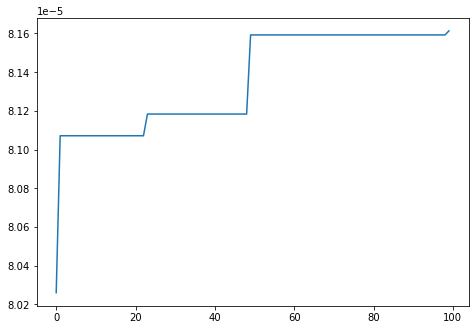

In [18]:
print('==> Fitness Tebaik Keseluruhan : ',fitness_terbaik)
print()
print('==> Fitness Terbaik : ',max(fitness_terbaik))
print()
print('## Grafik Fitness Terbaik :')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fitness_terbaik)
plt.show()

==> Jarak Total Minimum Keseluruhan :  [12459.394262031707, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12334.765728415274, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12317.73035219079, 12256.

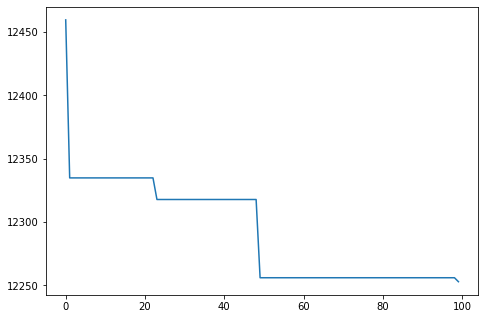

In [19]:
print('==> Jarak Total Minimum Keseluruhan : ',totalJarakBaru)
print()
print('==> Jarak Total Terbaik : ',min(totalJarakBaru))
print()
print('## Grafik Jarak Total Minimum :')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(totalJarakBaru)
plt.show()